In [143]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

In [144]:
# from google.colab import drive
# drive.mount('/content/drive')

In [145]:
dataset = pd.read_excel('Dataset UAS.xlsx', sheet_name='Produktivitas')
dataset = dataset.drop(columns=['No', 'Nama Kota'])

In [146]:
print("Shape:", dataset.shape)
print(dataset.head())
print(dataset.isna().sum())

Shape: (90, 15)
   2010  2011  2012  2013  2014  2015  2016  2017     2018     2019     2020  \
0  2116  5415  3242  3589  3900  3711  2439  2470  2592.95  2296.08  2577.88   
1  3342  3807  4304  4245  3782  3937  3494  1681  2833.75  2377.22  2558.76   
2  5785  5203     0     0     0     0  3146     0     0.00     0.00  1111.11   
3     0  3304  4491  4828  4789  4666  5026  4965  4954.95  4483.00  3578.55   
4     0  5131  2702  3890  4887  4739  4816  3946  3704.37  3146.06  2961.19   

      2021    2022  2023  2024  
0  3419.10  3437.8     0     0  
1  3432.36  3450.3  2759     0  
2  6835.39   876.4  6166     0  
3  3269.31   875.7   496     0  
4  3703.33  3551.7  5000     0  
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
dtype: int64


In [147]:
dataset.columns

Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024],
      dtype='object')

In [148]:
dataset_num = dataset.select_dtypes(include='number')
dataset_num = dataset_num.fillna(dataset_num.mean())

# ubah semua nama kolom jadi string
dataset_num.columns = dataset_num.columns.astype(str)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_num)

In [149]:
dataset.columns = dataset.columns.astype(str)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [150]:
print(dataset.shape)
print(dataset.isna().sum())

(90, 15)
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
dtype: int64


In [151]:
dataset = dataset.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

agglo = AgglomerativeClustering(n_clusters=10)
cluster_labels = agglo.fit_predict(scaled_data)


In [152]:
# Tambahkan label ke dataframe
dataset['cluster_label'] = cluster_labels

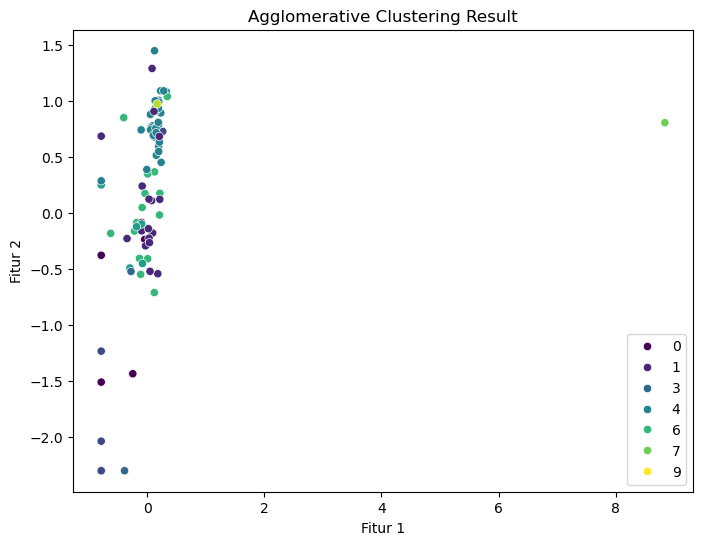

In [153]:
# Visualisasi Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Agglomerative Clustering Result')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

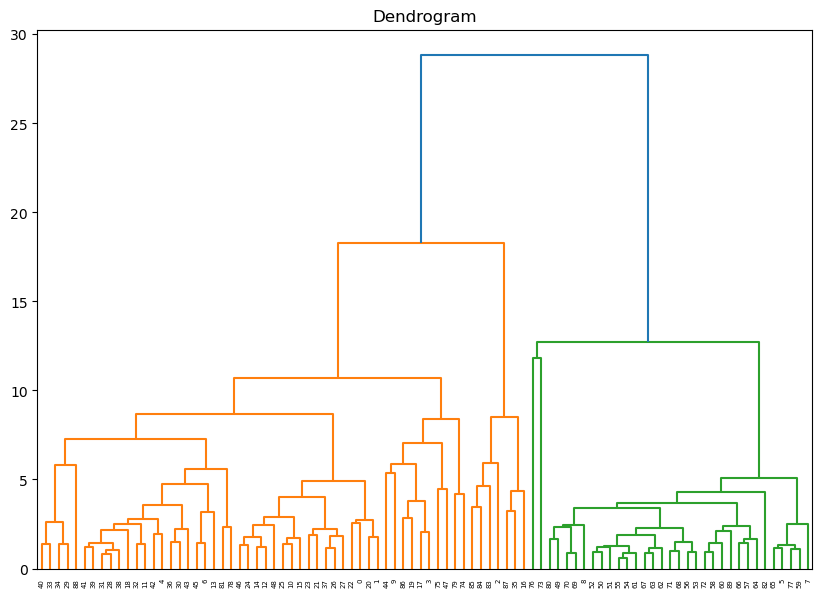

In [154]:
# Dendrogram
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram")
plt.show()

In [155]:
from sklearn.metrics import silhouette_score

# Silhouette Score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.23536443159838463


In [156]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, cluster_labels)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 1.1699417774864846
